## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(color_codes = True)
import matplotlib.pyplot as plt

## Importing Dataset

In [2]:
df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df.shape

(53940, 10)

In [4]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


### Checking if there is any null value

In [6]:
# Checking if there is any null values
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

### Checking for any duplicate entries and if so, removing them

In [7]:
df.duplicated().sum()

146

In [8]:
df.drop_duplicates(inplace=True)

# Ditribution of single continous variable

### Distplot
it is combination of histogram and Kde plot.

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


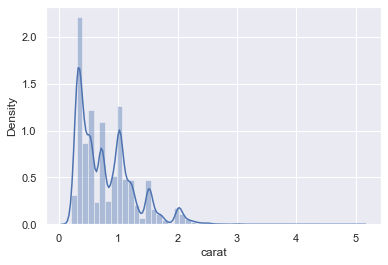

In [9]:
sns.distplot(df.carat);

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


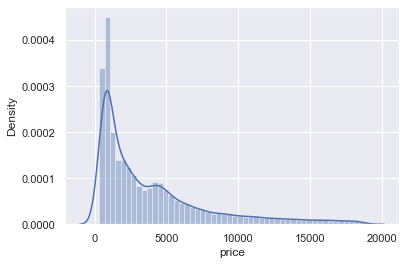

In [10]:
sns.distplot(df.price);

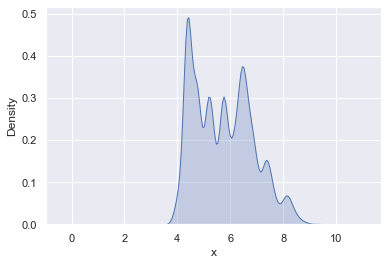

In [11]:
sns.kdeplot(df.x, shade=True);

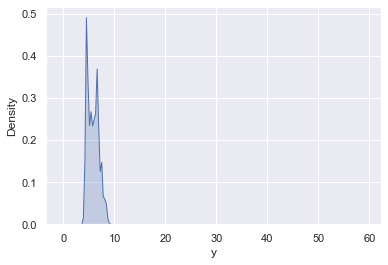

In [12]:
sns.kdeplot(df.y, shade=True);

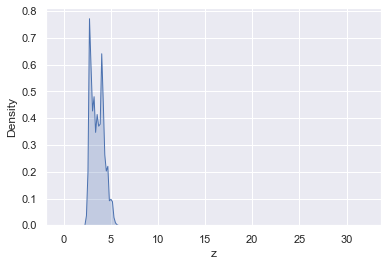

In [13]:
sns.kdeplot(df.z, shade=True);

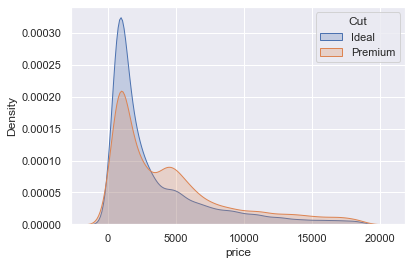

In [14]:
sns.kdeplot(df[df.cut == 'Ideal'].price, shade= True);
sns.kdeplot(df[df.cut == 'Premium'].price, shade=True);
plt.legend(title="Cut", labels= ['Ideal','Premium']);

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


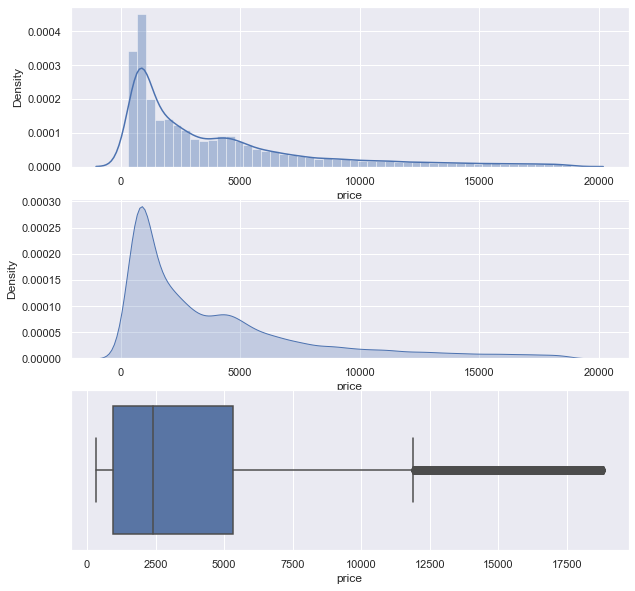

In [15]:
# Combining two or more different types of plot just fr the intiution, how it differs

fig, axs = plt.subplots(nrows= 3)
p1= fig.set_size_inches(10,10)
p2= sns.distplot(df.price, ax= axs[0]);
p3= sns.kdeplot(df.price, shade=True, ax= axs[1]);
sns.boxplot(x = 'price', data= df, ax= axs[2]);

### Plotting Histogram

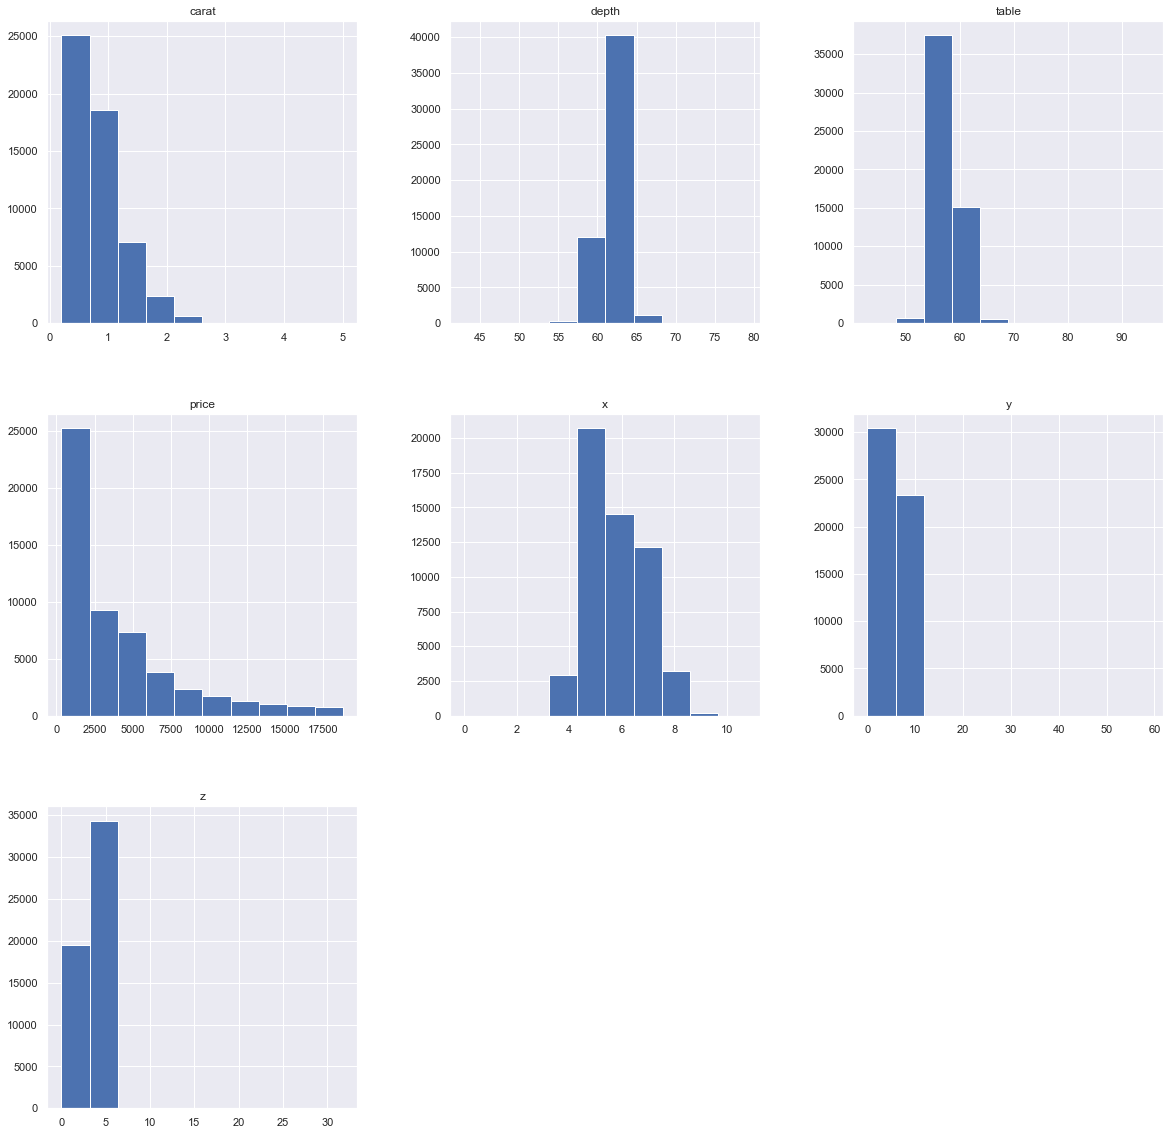

In [16]:
df.hist(figsize= (20,20))
plt.show()

# Distribution  for categorical features

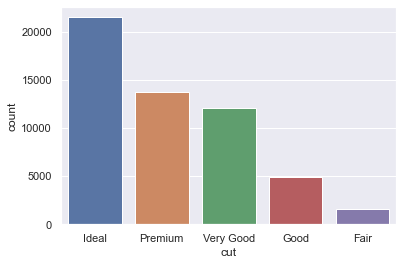

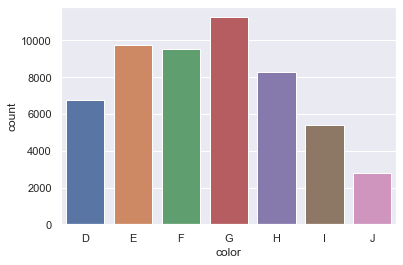

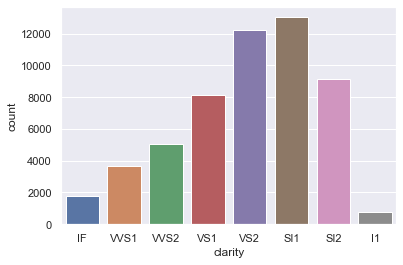

In [17]:
for feature in df.dtypes[df.dtypes == 'category'].index:
    sns.countplot(x= feature, data= df)
    plt.show()

# Joint Distribution of two features

### Joint Plot

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


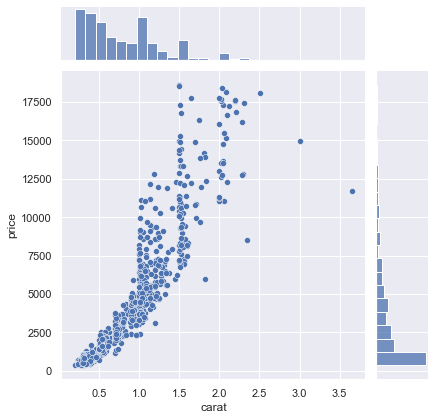

In [18]:
sns.jointplot('carat', 'price', data= df.sample(1000));

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


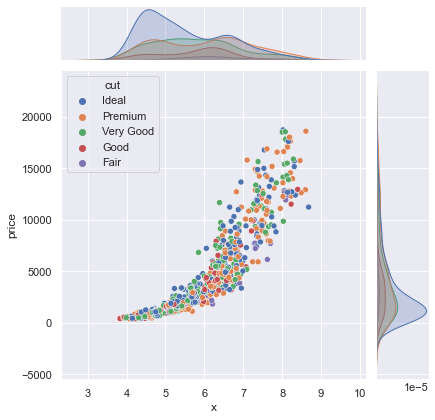

In [19]:
sns.jointplot('x', 'price', data= df.sample(1000), hue='cut');

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


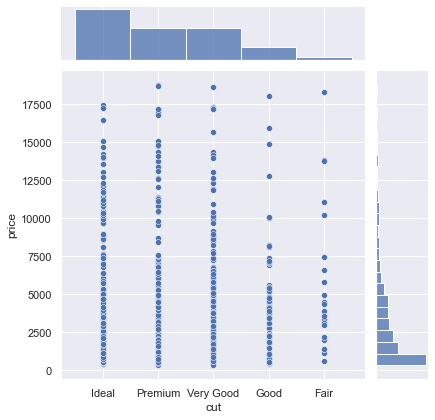

In [20]:
sns.jointplot('cut', 'price', data= df.sample(1000));

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


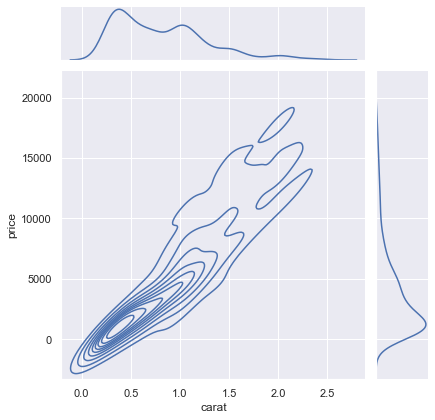

In [21]:
sns.jointplot('carat', 'price',kind='kde', data= df.sample(1000));

### Swarm Plot

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 34.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 49.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 42.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


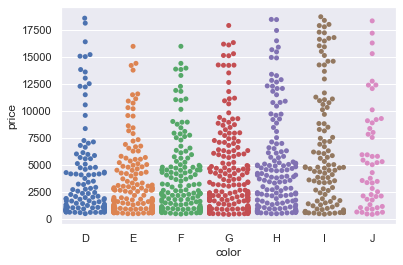

In [22]:
sns.swarmplot(x = 'color', y= 'price', data= df.sample(1000));

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 51.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 28.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 28.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


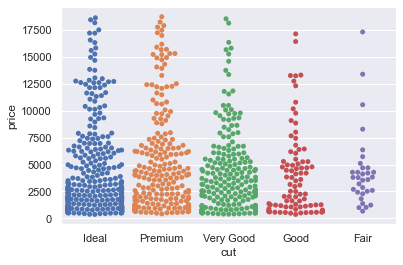

In [23]:
sns.swarmplot(x = 'cut', y= 'price', data= df.sample(1000));

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 34.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 44.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 46.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 38.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


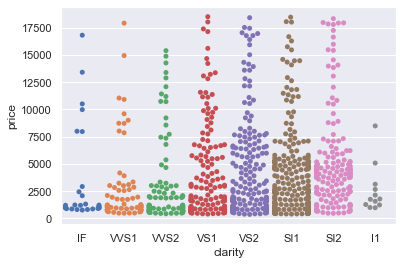

In [24]:
sns.swarmplot(x= 'clarity', y= 'price', data= df.sample(1000));

### Violin Plot
Voilin plots show the IQR range by the black dots line and the white dot shows the median value also the most distribution of the data. In short, you may say that, violin plot is the combinbation of box plot and Kde plot.

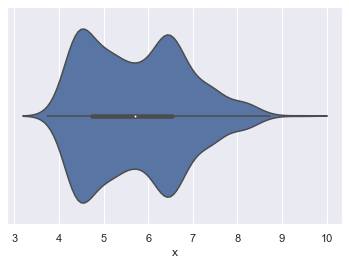

In [25]:
sns.violinplot(x='x', data= df.sample(1000));

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


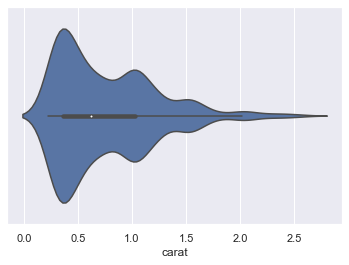

In [26]:
sns.violinplot(x='carat', data= df.sample(1000), orient='v');

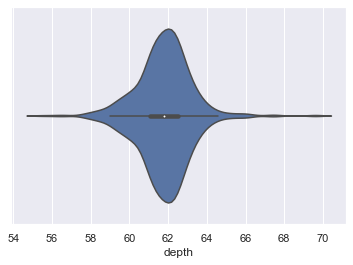

In [27]:
sns.violinplot(x='depth', data= df.sample(1000));

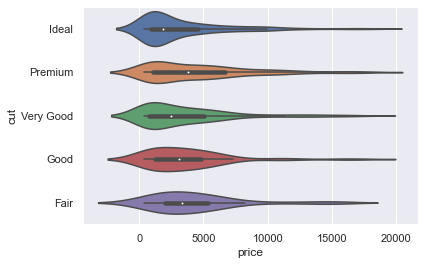

In [28]:
sns.violinplot(x= "price", y="cut", data= df.sample(1000));

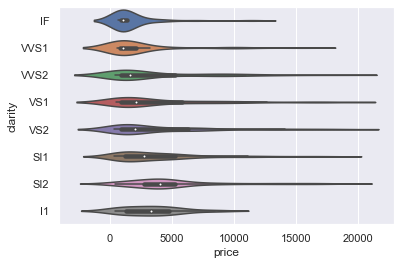

In [29]:
sns.violinplot(x= "price", y="clarity", data= df.sample(1000));

### Faceted Plotting
Faceted plotting alows us to plot 'n' number of specified plots as per our requirements and brownie point is that it automatically align each plot.

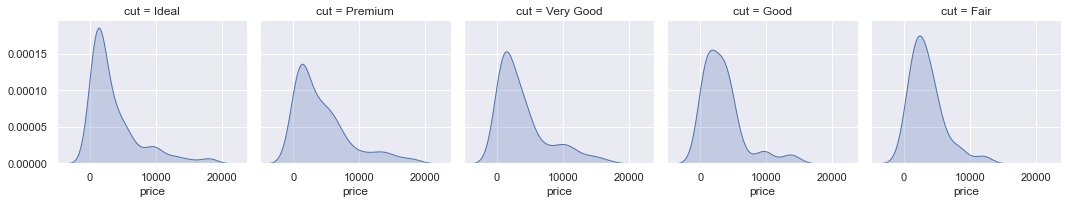

In [30]:
x = sns.FacetGrid(df.sample(1000), col= 'cut');
x.map(sns.kdeplot, "price", shade=True);

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


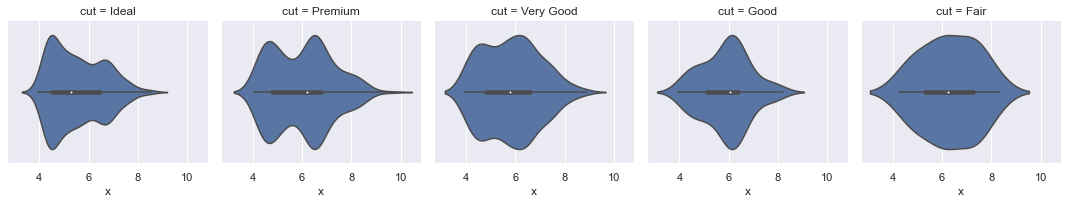

In [31]:
y = sns.FacetGrid(df.sample(1000), col= "cut");
y.map(sns.violinplot, 'x')

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


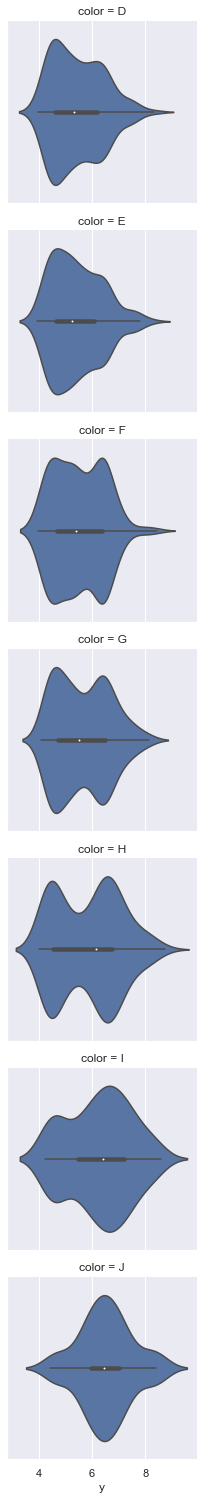

In [32]:
y = sns.FacetGrid(df.sample(1000), row= "color");
y.map(sns.violinplot, 'y')

### Pair Plot
Pair plot plots the joint distribution of one feature with the all other features of each feature in the dataset.
Thus, it is most useful for getting quick insights from the given data and also help in selecting the machine learning algorithm to implement. Yes, it is more needful to do more analysis in order to get robust insights but in a while you may get general overview about the data.

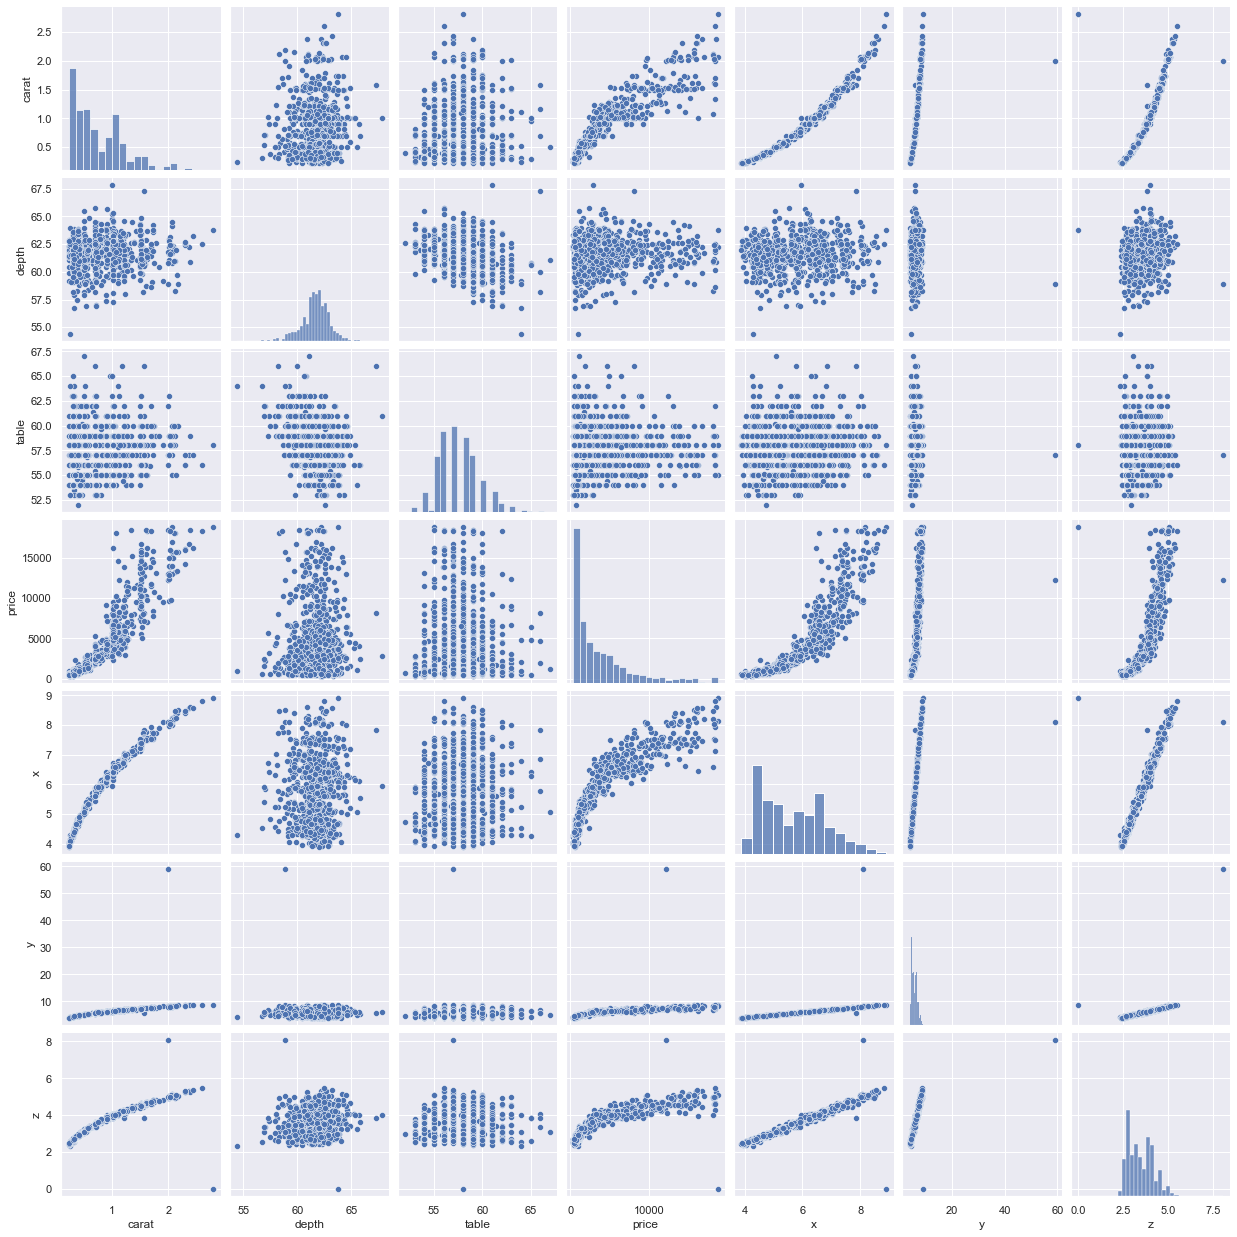

In [33]:
sns.pairplot(df.sample(1000));

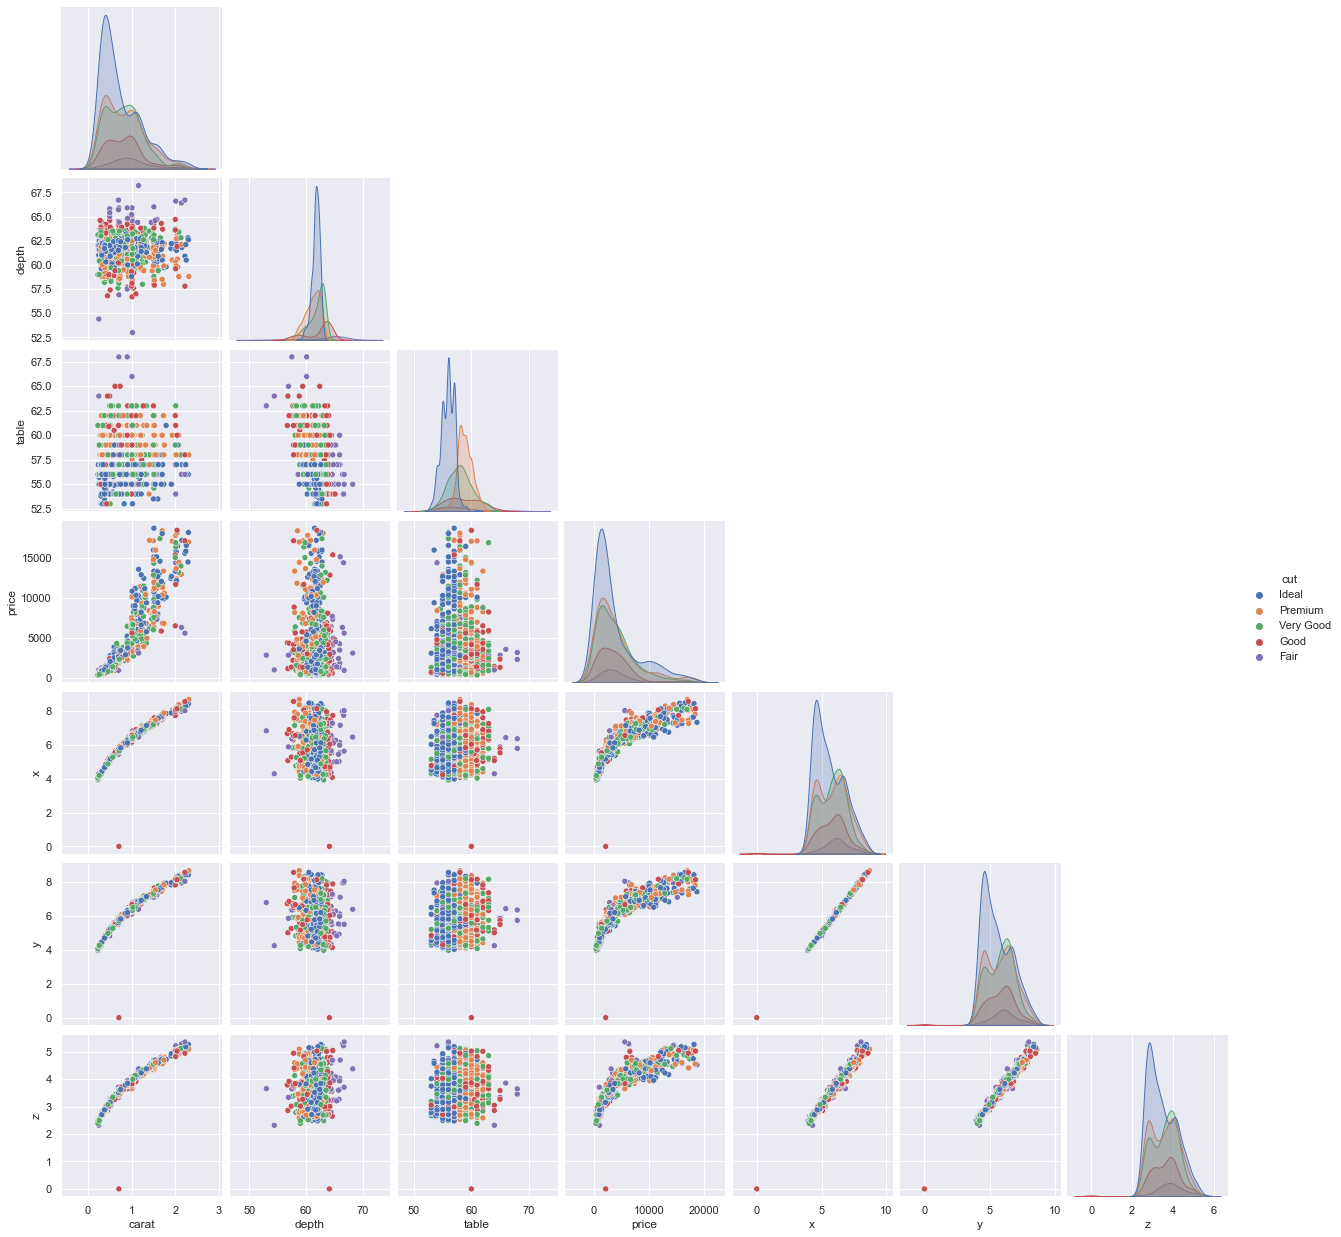

In [34]:
sns.pairplot(df.sample(1000), hue= 'cut', corner=True);

### Correlation Matrix
A correlation matrix is a table showing correlation coefficients between sets of variables. Each random variable (Xi) in the table is correlated with each of the other values in the table (Xj). This allows you to see which pairs have the highest correlation.

<AxesSubplot:>

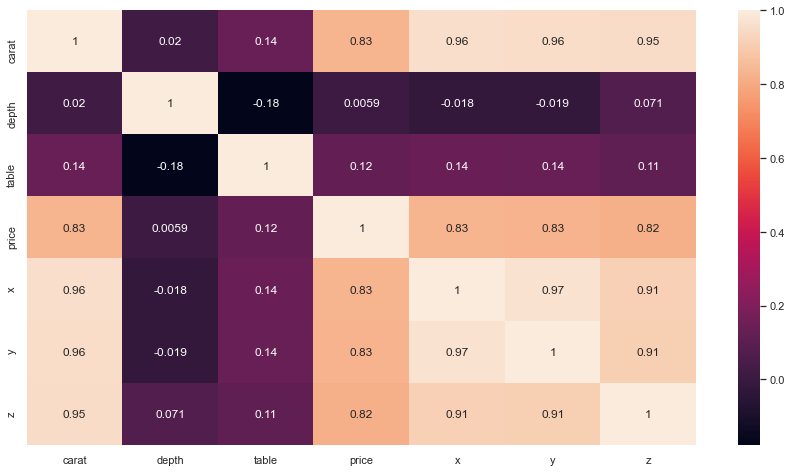

In [35]:
corr = df.corr(method = 'kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot= True)